# Simulating the extraction from a long guide with gravity

# extraction without Gravity and finite circular beam
## Simulation of data

In [31]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03
sim.num_neutrons = 1e7
pd = sim.params_dict
pd['g'] = 0
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1
mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1 -c -n 10000000.0
CompletedProcess(args=['mcrun', '/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr', 'det_width=0.218', 'det_width_focus=0.03', 'source_width=0.03', 'guide_width=0.218', 'L_source=

## Data from hard to handle mcstas save folder to easier data dict

In [32]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()

with open('data/data_{}_g_length{}.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

## Evaluation and plotting of data
### Here with gravity

g1_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.6000589612247655
g1_divpos.dat
g1_divv_lambda.dat
f_divv_lambda.dat
f_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.5709135103695703
source_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 1.0
f_psd_zoom.dat
[-1.5 -1.  -0.5  0.   0.5  1.   1.5]
intensity 0.22234320533445975
f_divpos.dat
source_psd_beforeoptic.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.8386424280180634
sourceafteroptic_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.6684896448970923


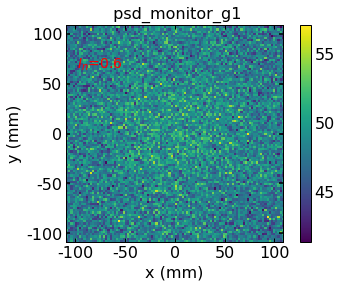

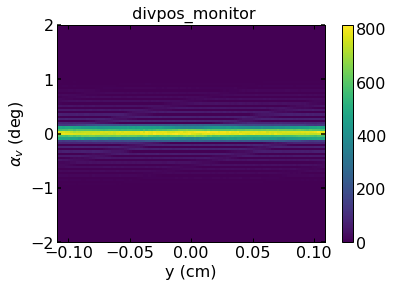

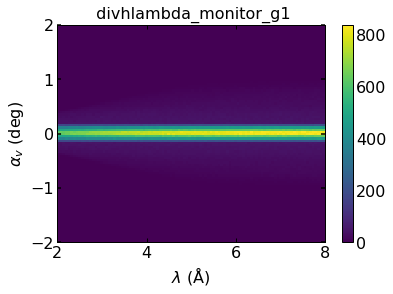

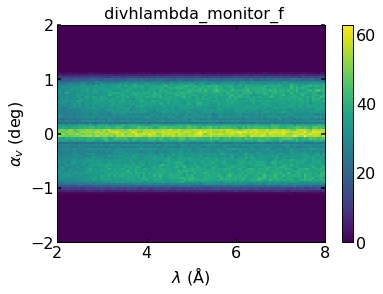

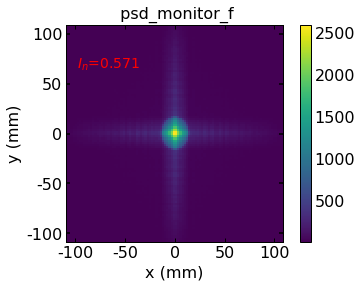

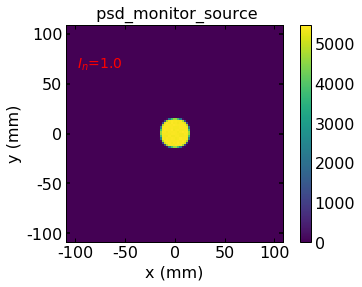

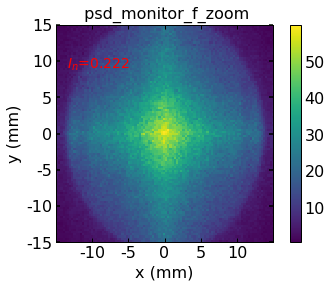

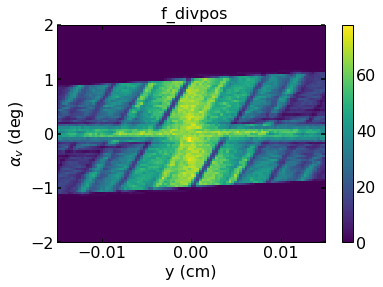

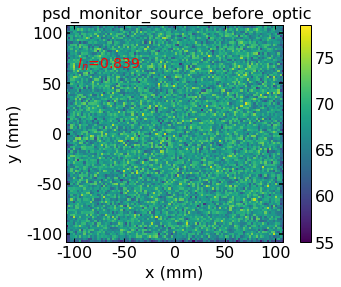

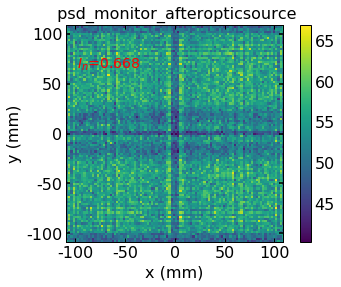

In [33]:
with open('data/data_zero_g_length160.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160.txt', 'rb') as file:
    meta_dict = pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd.dat']
meta_dict = image_metadata
for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, '$I_n$={:.3}'.format(ratio), transform=ax.transAxes, color='red', fontsize=14)
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, '$I_n$={:.3}'.format(ratio), transform=ax.transAxes, color='red', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_dict[key][' g']) == 0 else 'finite'))

# Exraction from long guide finite beamspot and gravity
## Simulation of data


In [23]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03
sim.num_neutrons = 5e7
pd = sim.params_dict
pd['g'] = -9.81
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=-9.81 max_div=10 pixels=100 flux=50000000.0 placeholder=1
mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=-9.81 max_div=10 pixels=100 flux=50000000.0 placeholder=1 -c -n 50000000.0
CompletedProcess(args=['mcrun', '/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr', 'det_width=0.218', 'det_width_focus=0.03', 'source_width=0.03', 'guide_width=0.218', 'L

In [24]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()
print('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']))
with open('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

data/data_finite_g_length160finite_beamspot.txt


## Import data from pickle files

g1_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.5993342357707341
g1_divpos.dat
g1_divv_lambda.dat
f_divv_lambda.dat
f_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.5691208008761862
source_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 1.0
f_psd_zoom.dat
[-1.5 -1.  -0.5  0.   0.5  1.   1.5]
intensity 0.20659254805607893
f_divpos.dat
source_psd_beforeoptic.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.8385573607183141
sourceafteroptic_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.6682487883038565


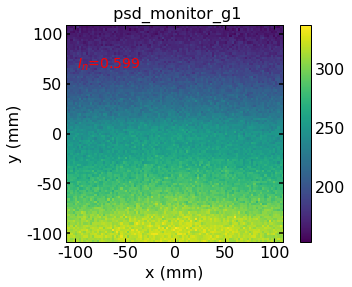

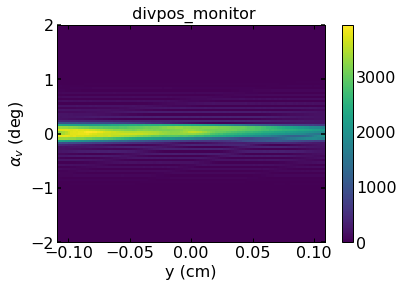

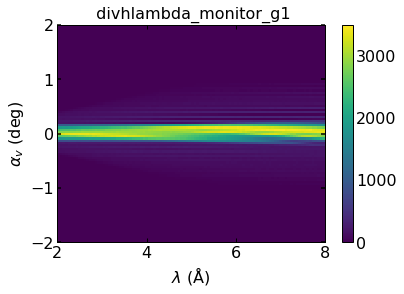

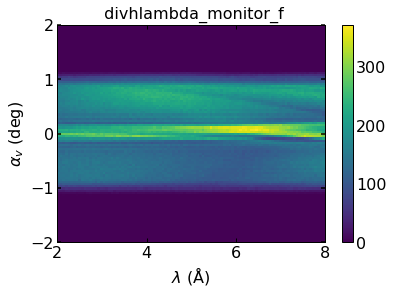

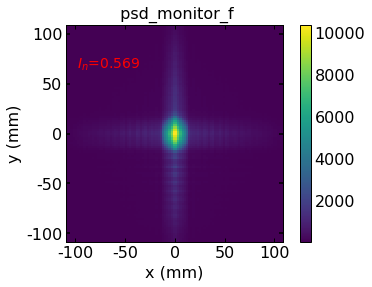

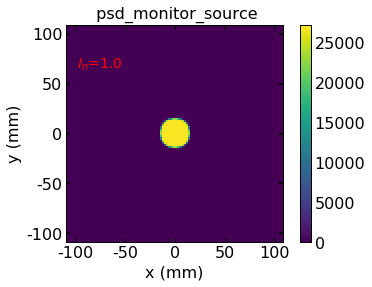

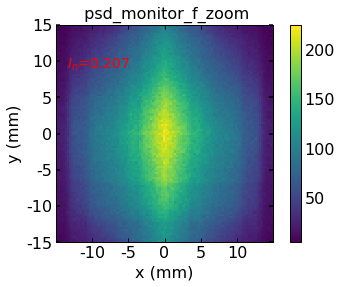

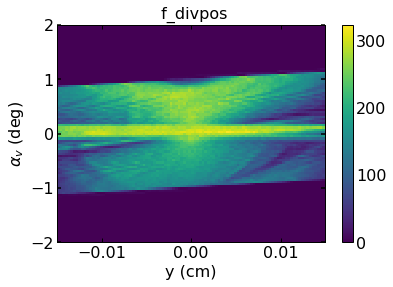

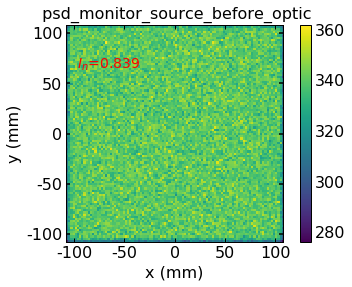

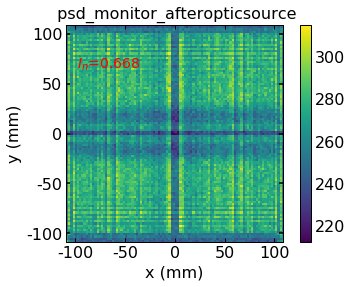

In [29]:
with open('data/data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_metadata = pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd.dat']
meta_dict = image_metadata
for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, '$I_n$={:.3}'.format(ratio), transform=ax.transAxes, color='red', fontsize=14)
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, '$I_n$={:.3}'.format(ratio), transform=ax.transAxes, color='red', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_dict[key][' g']) == 0 else 'finite'))

In [46]:
meta_dict.keys()

dict_keys(['g1_psd.dat', 'g1_divpos.dat', 'f_divpos.dat', 'sourceafteroptic_psd.dat', 'g1_divv_lambda.dat', 'f_divv_lambda.dat', 'source_psd.dat', 'f_psd.dat', 'f_psd_zoom.dat'])

# ESS geometry without gravity


In [1]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/ess_moderator_extraction/','ess_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03*100
sim.num_neutrons = 1e7
pd = sim.params_dict
pd['g'] = 0
pd['incoming_length'] = 5000
pd['source_width'] = source_width/100
pd['det_width_focus'] = source_width/100
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 0.8
pd['guide_length'] = 160
pd['pixels'] = 100
pd['mirrors'] = 20
pd['focal_length'] = 2.5
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/ess_moderator_extraction/ess_extraction.instr det_width=0.2 det_width_focus=0.03 source_width=0.03 guide_width=0.1 L_source=4 guide_length=160 dL=1 L_min=3 L_max=5 source_divergence=0.8 divergence_max=1 focal_length=2.5 mirrors=20 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1
mcrun /home/cherb/Documents/McStas/ess_moderator_extraction/ess_extraction.instr det_width=0.2 det_width_focus=0.03 source_width=0.03 guide_width=0.1 L_source=4 guide_length=160 dL=1 L_min=3 L_max=5 source_divergence=0.8 divergence_max=1 focal_length=2.5 mirrors=20 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1 -c -n 10000000.0
CompletedProcess(args=['mcrun', '/home/cherb/Documents/McStas/ess_moderator_extraction/ess_extraction.instr', 'det_width=0.2', 'det_width_focus=0.03', 'source_width=0.03', 'guide_width=0.1', 'L_source=4', 'guide_length=160', 'dL=1', 'L_min=3', 'L_max=5', 'source_divergence=0.8', 'divergence_max=1

In [2]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()

with open('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

## Import data from pickle files

<ipython-input-3-93e649eff918>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(k*10) for k in ax.get_xticks()])
<ipython-input-3-93e649eff918>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])


intensity 0.9361307568210425


<ipython-input-3-93e649eff918>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(k*10) for k in ax.get_xticks()])
<ipython-input-3-93e649eff918>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])


intensity 1.0000000000019311


<ipython-input-3-93e649eff918>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(k*10) for k in ax.get_xticks()])
<ipython-input-3-93e649eff918>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])


intensity 1.0


<ipython-input-3-93e649eff918>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(k*10) for k in ax.get_xticks()])
<ipython-input-3-93e649eff918>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])


intensity 0.9361307568293733


<ipython-input-3-93e649eff918>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])


intensity 0.40108591468082316


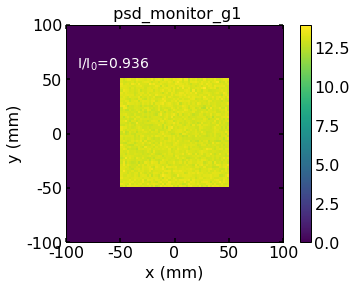

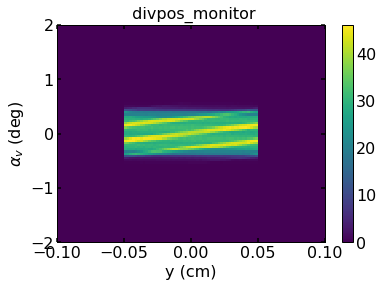

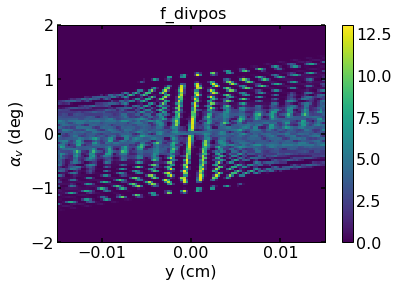

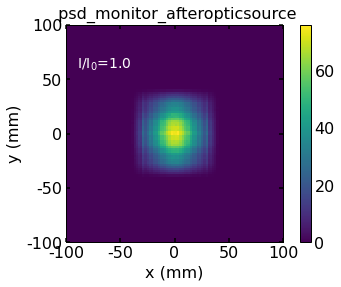

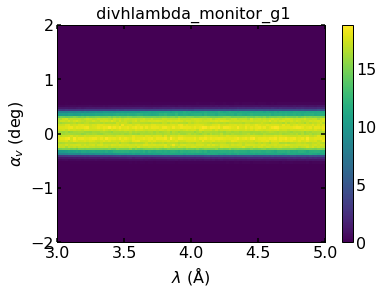

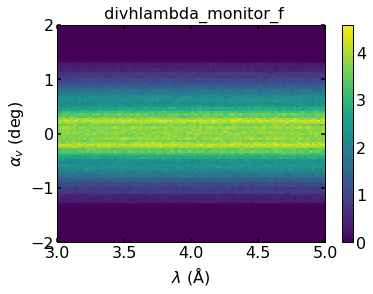

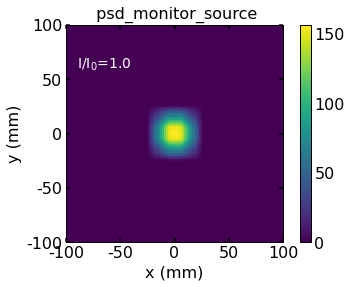

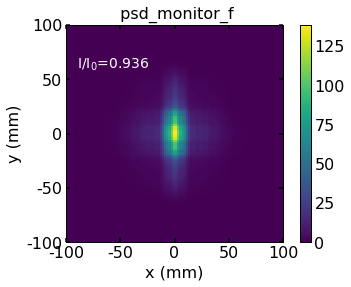

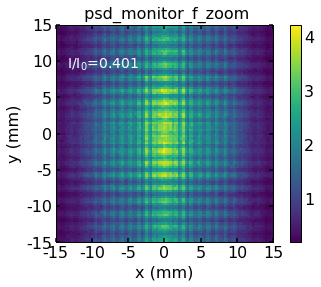

In [3]:
with open('data/data_zero_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160finite_beamspot.txt', 'rb') as file:
    image_metadata = pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd.dat']
meta_dict = image_metadata
for key in images.keys():
    fig, ax = images[key]
    if 'psd.' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticklabels([round(k*10) for k in ax.get_xticks()])
        ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, 'I/I$_0$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([round(k*10) for k in ax.get_xticks()])
        ax.set_yticklabels([round(k*10) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, 'I/I$_0$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_dict[key][' g']) == 0 else 'finite'))